# <p align =center>Evaluation par les pairs : Concentration de CO2 dans l'atmosphère depuis 1958</p>

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

**Téléchargemet des données le 02/09/2025**

In [10]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
data_file = "monthly_in_situ_co2_mlo.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [11]:
raw_data = pd.read_csv(data_file, skiprows=63)
raw_data

Excel                 [ppm]      [ppm]         [ppm]  \
1958     1  21200  1958.0411      -99.99    -99.99      -99.99       -99.99   
1958     2  21231  1958.1260      -99.99    -99.99      -99.99       -99.99   
1958     3  21259  1958.2027      315.71    314.43      316.20       314.91   
1958     4  21290  1958.2877      317.45    315.15      317.31       314.99   
1958     5  21320  1958.3699      317.51    314.68      317.89       315.07   
1958     6  21351  1958.4548      -99.99    -99.99      317.27       315.14   
1958     7  21381  1958.5370      315.87    315.20      315.85       315.22   
1958     8  21412  1958.6219      314.93    316.23      313.95       315.29   
1958     9  21443  1958.7068      313.21    316.12      312.42       315.35   
1958    10  21473  1958.7890      -99.99    -99.99      312.41       315.41   
1958    11  21504  1958.8740      313.33    315.21      313.60       315.46   
1958    12  21534  1958.9562      314.67    315.43      314.77       315.52   
1959     1  21565  1959.0411      315.58    315.52      315.64       315.57   
1959     2  21596  1959.1260      316.49    315.83      316.30       315.64   
1959     3  21624  1959.2027      316.65    315.37      317.00       315.70   
1959     4  21655  1959.2877      317.72    315.41      318.10       315.77   
1959     5  21685  1959.3699      318.29    315.46      318.69       315.85   
1959     6  21716  1959.4548      318.15    316.00      318.08       315.94   
1959     7  21746  1959.5370      316.54    315.87      316.67       316.03   
1959     8  21777  1959.6219      314.79    316.10      314.79       316.13   
1959     9  21808  1959.7068      313.84    316.76      313.28       316.22   
1959    10  21838  1959.7890      313.33    316.35      313.31       316.31   
1959    11  21869  1959.8740      314.81    316.69      314.53       316.40   
1959    12  21899  1959.9562      315.58    316.35      315.72       316.48   
1960     1  21930  1960.0410      316.43    316.37      316.63       316.56   
1960     2  21961  1960.1257      316.98    316.33      317.30       316.64   
1960     3  21990  1960.2049      317.58    316.27      318.04       316.71   
1960     4  22021  1960.2896      319.03    316.69      319.14       316.79   
1960     5  22051  1960.3716      320.03    317.19      319.70       316.86   
1960     6  22082  1960.4563      319.58    317.44      319.05       316.92   
...    ...    ...        ...         ...       ...         ...          ...   
2023     7  45122  2023.5370      421.62    420.83      421.72       420.96   
2023     8  45153  2023.6219      419.56    421.12      419.67       421.27   
2023     9  45184  2023.7068      418.06    421.56      418.07       421.58   
2023    10  45214  2023.7890      418.41    422.01      418.30       421.89   
2023    11  45245  2023.8740      420.11    422.37      419.97       422.20   
2023    12  45275  2023.9562      421.65    422.57      421.60       422.50   
2024     1  45306  2024.0410      422.62    422.55      422.88       422.80   
2024     2  45337  2024.1257      424.34    423.56      423.89       423.10   
2024     3  45366  2024.2049      425.22    423.65      424.95       423.37   
2024     4  45397  2024.2896      426.30    423.50      426.47       423.66   
2024     5  45427  2024.3716      426.70    423.30      427.33       423.93   
2024     6  45458  2024.4563      426.62    424.07      426.75       424.21   
2024     7  45488  2024.5383      425.40    424.63      425.22       424.48   
2024     8  45519  2024.6230      422.70    424.30      423.13       424.76   
2024     9  45550  2024.7077      421.60    425.11      421.50       425.03   
2024    10  45580  2024.7896      422.05    425.66      421.70       425.29   
2024    11  45611  2024.8743      423.61    425.87      423.31       425.54   
2024    12  45641  2024.9563      425.01    425.93      424.87       425.76   
2025     1  45672  2025.0411      426.42    426.35      426.07       425.

Ensuite on modifie la première colonne afin de bien les identifier


In [14]:
raw_data.columns = "mois", "date decimal", "date?", "CO2(ppm)", "seasonally adjusted(ppm)", "fit(ppm)","seasonally adjusted fit(ppm)","CO2 filled(ppm)","seasonally adjusted filled(ppm)", "institut qui fait les mesures"

raw_data

mois  date decimal      date?  CO2(ppm)  seasonally adjusted(ppm)  \
1958     1         21200  1958.0411    -99.99                    -99.99   
1958     2         21231  1958.1260    -99.99                    -99.99   
1958     3         21259  1958.2027    315.71                    314.43   
1958     4         21290  1958.2877    317.45                    315.15   
1958     5         21320  1958.3699    317.51                    314.68   
1958     6         21351  1958.4548    -99.99                    -99.99   
1958     7         21381  1958.5370    315.87                    315.20   
1958     8         21412  1958.6219    314.93                    316.23   
1958     9         21443  1958.7068    313.21                    316.12   
1958    10         21473  1958.7890    -99.99                    -99.99   
1958    11         21504  1958.8740    313.33                    315.21   
1958    12         21534  1958.9562    314.67                    315.43   
1959     1         21565  1959.0411    315.58                    315.52   
1959     2         21596  1959.1260    316.49                    315.83   
1959     3         21624  1959.2027    316.65                    315.37   
1959     4         21655  1959.2877    317.72                    315.41   
1959     5         21685  1959.3699    318.29                    315.46   
1959     6         21716  1959.4548    318.15                    316.00   
1959     7         21746  1959.5370    316.54                    315.87   
1959     8         21777  1959.6219    314.79                    316.10   
1959     9         21808  1959.7068    313.84                    316.76   
1959    10         21838  1959.7890    313.33                    316.35   
1959    11         21869  1959.8740    314.81                    316.69   
1959    12         21899  1959.9562    315.58                    316.35   
1960     1         21930  1960.0410    316.43                    316.37   
1960     2         21961  1960.1257    316.98                    316.33   
1960     3         21990  1960.2049    317.58                    316.27   
1960     4         22021  1960.2896    319.03                    316.69   
1960     5         22051  1960.3716    320.03                    317.19   
1960     6         22082  1960.4563    319.58                    317.44   
...    ...           ...        ...       ...                       ...   
2023     7         45122  2023.5370    421.62                    420.83   
2023     8         45153  2023.6219    419.56                    421.12   
2023     9         45184  2023.7068    418.06                    421.56   
2023    10         45214  2023.7890    418.41                    422.01   
2023    11         45245  2023.8740    420.11                    422.37   
2023    12         45275  2023.9562    421.65                    422.57   
2024     1         45306  2024.0410    422.62                    422.55   
2024     2         45337  2024.1257    424.34                    423.56   
2024     3         45366  2024.2049    425.22                    423.65   
2024     4         45397  2024.2896    426.30                    423.50   
2024     5         45427  2024.3716    426.70                    423.30   
2024     6         45458  2024.4563    426.62                    424.07   
2024     7         45488  2024.5383    425.40                    424.63   
2024     8         45519  2024.6230    422.70                    424.30   
2024     9         45550  2024.7077    421.60                    425.11   
2024    10         45580  2024.7896    422.05                    425.66   
2024    11         45611  2024.8743    423.61                    425.87   
2024    12         45641  2024.9563    425.01                    425.93   
2025     1         45672  2025.0411    426.42                    426.35   
2025     2         45703  2025.1260    427.00                    426.21   
2025     3         45731  2025.2027    427.73                    426.19   
2025     4         45762  2025.

On décale ensuite les années afin qu'elles ne soit plus en indice

In [15]:
data = raw_data.reset_index()       # l'année devient une vraie colonne
data.rename(columns={'index': 'year'}, inplace=True)  # renomme l'index en "year"
data

year  mois  date decimal      date?  CO2(ppm)  seasonally adjusted(ppm)  \
0    1958     1         21200  1958.0411    -99.99                    -99.99   
1    1958     2         21231  1958.1260    -99.99                    -99.99   
2    1958     3         21259  1958.2027    315.71                    314.43   
3    1958     4         21290  1958.2877    317.45                    315.15   
4    1958     5         21320  1958.3699    317.51                    314.68   
5    1958     6         21351  1958.4548    -99.99                    -99.99   
6    1958     7         21381  1958.5370    315.87                    315.20   
7    1958     8         21412  1958.6219    314.93                    316.23   
8    1958     9         21443  1958.7068    313.21                    316.12   
9    1958    10         21473  1958.7890    -99.99                    -99.99   
10   1958    11         21504  1958.8740    313.33                    315.21   
11   1958    12         21534  1958.9562    314.67                    315.43   
12   1959     1         21565  1959.0411    315.58                    315.52   
13   1959     2         21596  1959.1260    316.49                    315.83   
14   1959     3         21624  1959.2027    316.65                    315.37   
15   1959     4         21655  1959.2877    317.72                    315.41   
16   1959     5         21685  1959.3699    318.29                    315.46   
17   1959     6         21716  1959.4548    318.15                    316.00   
18   1959     7         21746  1959.5370    316.54                    315.87   
19   1959     8         21777  1959.6219    314.79                    316.10   
20   1959     9         21808  1959.7068    313.84                    316.76   
21   1959    10         21838  1959.7890    313.33                    316.35   
22   1959    11         21869  1959.8740    314.81                    316.69   
23   1959    12         21899  1959.9562    315.58                    316.35   
24   1960     1         21930  1960.0410    316.43                    316.37   
25   1960     2         21961  1960.1257    316.98                    316.33   
26   1960     3         21990  1960.2049    317.58                    316.27   
27   1960     4         22021  1960.2896    319.03                    316.69   
28   1960     5         22051  1960.3716    320.03                    317.19   
29   1960     6         22082  1960.4563    319.58                    317.44   
..    ...   ...           ...        ...       ...                       ...   
786  2023     7         45122  2023.5370    421.62                    420.83   
787  2023     8         45153  2023.6219    419.56                    421.12   
788  2023     9         45184  2023.7068    418.06                    421.56   
789  2023    10         45214  2023.7890    418.41                    422.01   
790  2023    11         45245  2023.8740    420.11                    422.37   
791  2023    12         45275  2023.9562    421.65                    422.57   
792  2024     1         45306  2024.0410    422.62                    422.55   
793  2024     2         45337  2024.1257    424.34                    423.56   
794  2024     3         45366  2024.2049    425.22                    423.65   
795  2024     4         45397  2024.2896    426.30                    423.50   
796  2024     5         45427  2024.3716    426.70                    423.30   
797  2024     6         45458  2024.4563    426.62                    424.07   
798  2024     7         45488  2024.5383    425.40                    424.63   
799  2024     8         45519  2024.6230    422.70                    424.30   
800  2024     9         45550  2024.7077    421.60                    425.11   
801  2024    10         45580  2024.7896    422.05                    425.66   
802  2024    11         45611  2024.8743    423.61                    425.87   
803  2024    12         45641  2024.9563    425.01                    425.93   
804  

Les cases de ce tableau de données remplient avec la valeur -99.99 correspondent a des cases vide il faut donc modifier cela avec des cases vide :


In [18]:
import numpy as np
data = data.replace(-99.99, np.nan)
data

year  mois  date decimal      date?  CO2(ppm)  seasonally adjusted(ppm)  \
0    1958     1         21200  1958.0411       NaN                       NaN   
1    1958     2         21231  1958.1260       NaN                       NaN   
2    1958     3         21259  1958.2027    315.71                    314.43   
3    1958     4         21290  1958.2877    317.45                    315.15   
4    1958     5         21320  1958.3699    317.51                    314.68   
5    1958     6         21351  1958.4548       NaN                       NaN   
6    1958     7         21381  1958.5370    315.87                    315.20   
7    1958     8         21412  1958.6219    314.93                    316.23   
8    1958     9         21443  1958.7068    313.21                    316.12   
9    1958    10         21473  1958.7890       NaN                       NaN   
10   1958    11         21504  1958.8740    313.33                    315.21   
11   1958    12         21534  1958.9562    314.67                    315.43   
12   1959     1         21565  1959.0411    315.58                    315.52   
13   1959     2         21596  1959.1260    316.49                    315.83   
14   1959     3         21624  1959.2027    316.65                    315.37   
15   1959     4         21655  1959.2877    317.72                    315.41   
16   1959     5         21685  1959.3699    318.29                    315.46   
17   1959     6         21716  1959.4548    318.15                    316.00   
18   1959     7         21746  1959.5370    316.54                    315.87   
19   1959     8         21777  1959.6219    314.79                    316.10   
20   1959     9         21808  1959.7068    313.84                    316.76   
21   1959    10         21838  1959.7890    313.33                    316.35   
22   1959    11         21869  1959.8740    314.81                    316.69   
23   1959    12         21899  1959.9562    315.58                    316.35   
24   1960     1         21930  1960.0410    316.43                    316.37   
25   1960     2         21961  1960.1257    316.98                    316.33   
26   1960     3         21990  1960.2049    317.58                    316.27   
27   1960     4         22021  1960.2896    319.03                    316.69   
28   1960     5         22051  1960.3716    320.03                    317.19   
29   1960     6         22082  1960.4563    319.58                    317.44   
..    ...   ...           ...        ...       ...                       ...   
786  2023     7         45122  2023.5370    421.62                    420.83   
787  2023     8         45153  2023.6219    419.56                    421.12   
788  2023     9         45184  2023.7068    418.06                    421.56   
789  2023    10         45214  2023.7890    418.41                    422.01   
790  2023    11         45245  2023.8740    420.11                    422.37   
791  2023    12         45275  2023.9562    421.65                    422.57   
792  2024     1         45306  2024.0410    422.62                    422.55   
793  2024     2         45337  2024.1257    424.34                    423.56   
794  2024     3         45366  2024.2049    425.22                    423.65   
795  2024     4         45397  2024.2896    426.30                    423.50   
796  2024     5         45427  2024.3716    426.70                    423.30   
797  2024     6         45458  2024.4563    426.62                    424.07   
798  2024     7         45488  2024.5383    425.40                    424.63   
799  2024     8         45519  2024.6230    422.70                    424.30   
800  2024     9         45550  2024.7077    421.60                    425.11   
801  2024    10         45580  2024.7896    422.05                    425.66   
802  2024    11         45611  2024.8743    423.61                    425.87   
803  2024    12         45641  2024.9563    425.01                    425.93   
804  

Pour la suite, comme c'est demandé dans la question 1 on trace un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente :

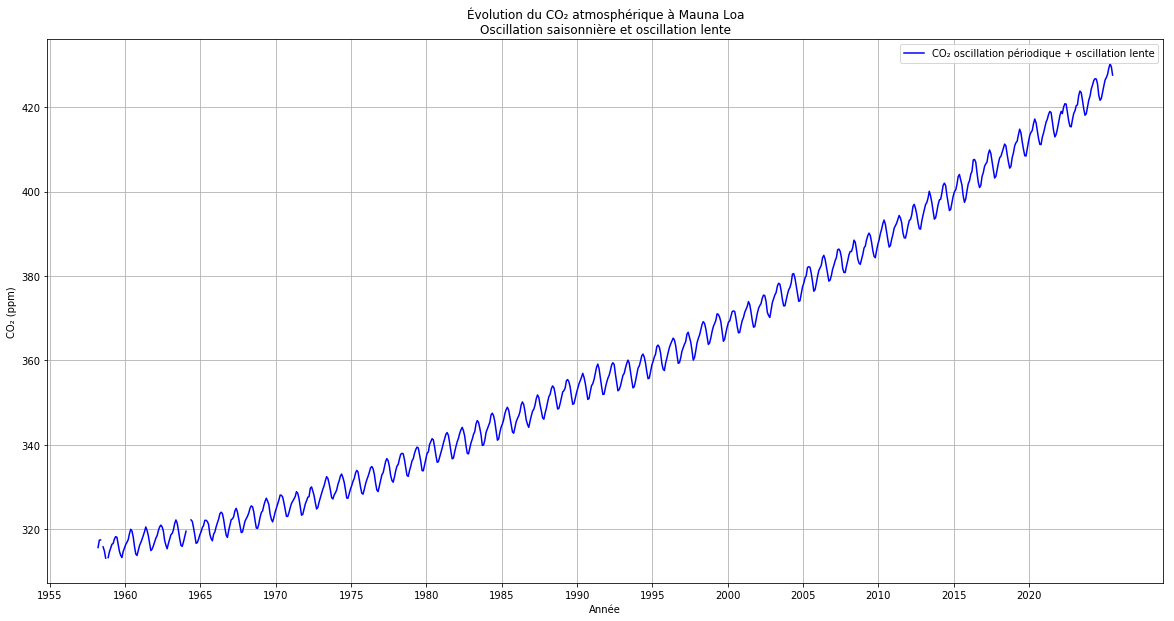

In [34]:
# Créer la figure
plt.figure(figsize=(20, 10))

# Courbe brute : oscillations saisonnières
plt.plot(data["date?"], data["CO2(ppm)"], label="CO₂ oscillation périodique + oscillation lente", color="blue")


# Mise en forme
plt.xlabel("Année")
plt.xticks(np.arange(1955, 2025, 5))
plt.ylabel("CO₂ (ppm)")
plt.title("Évolution du CO₂ atmosphérique à Mauna Loa\nOscillation saisonnière et oscillation lente")
plt.legend()
plt.grid(True)

plt.show()

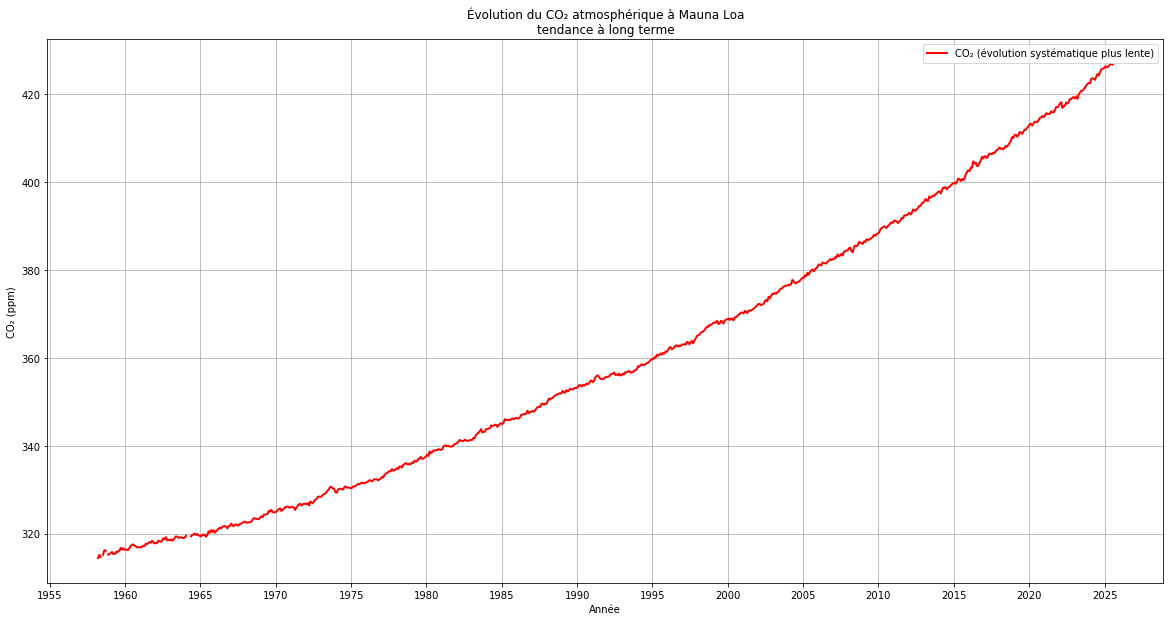

In [35]:

# Créer la figure
plt.figure(figsize=(20,10))

# Courbe lissée : tendance à long terme
plt.plot(data["date?"], data["seasonally adjusted(ppm)"], label="CO₂ (évolution systématique plus lente)", color="red", linewidth=2)

# Mise en forme
plt.xlabel("Année")
plt.xticks(np.arange(1955, 2026, 5))
plt.ylabel("CO₂ (ppm)")
plt.title("Évolution du CO₂ atmosphérique à Mauna Loa\ntendance à long terme")
plt.legend()
plt.grid(True)

plt.show()
